# Στειροπούλου Ευαγγελία 
### Α.Μ. 111520180016
## Εργασία 2η Αναγνώριση Προτύπων - Μηχανική Μάθηση



# Face recognition: 

In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install -U scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import glob
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
# from google.colab import drive
# drive.mount('/content/gdrive')

Requirement already up-to-date: scikit-learn in ./myenv/lib/python3.8/site-packages (1.2.2)


## I: loadImages function

In [2]:
def loadImages(path, set_number):
    image_paths = glob.glob(path + "/person*_*.png")

    image_matrix = []
    labels = []
    for path in image_paths:
        filename = path.split('/')[-1]
        person_id = int(filename.split('_')[0][6:])
        image_number = int(filename.split('_')[1].split('.')[0])

        if ((set_number == "Set_1" and 1 <= image_number <= 7) or
            (set_number == "Set_2" and 8 <= image_number <= 19) or
            (set_number == "Set_3" and 20 <= image_number <= 31) or
            (set_number == "Set_4" and 32 <= image_number <= 45) or
            (set_number == "Set_5" and 46 <= image_number <= 64)):

            image_array = np.array(plt.imread(path).flatten())
            image_matrix.append(image_array)
            labels.append(person_id)
    
    return np.array(image_matrix), labels


Όπως αναφέρεται στην εκφώνηση, η προεπεξεργασία της εικόνας είναι απαραραίτητη, και γίνεται με την αφαίρεση της μέσης τιμής της και στην συνέχεια με την διαίρεση με την τυπική απόκλιση των τιμών της.

In [3]:
def normalization(faces):
    X = np.ndarray(shape=faces.shape)  # Normalized data matrix
    for i in range(faces.shape[0]):
        X[i] = (faces[i] - np.mean(faces, axis=0)) / np.std(faces, axis=0)
    return X

## II: Train Eigenfaces method

Dimension: 9
Confusion matrix


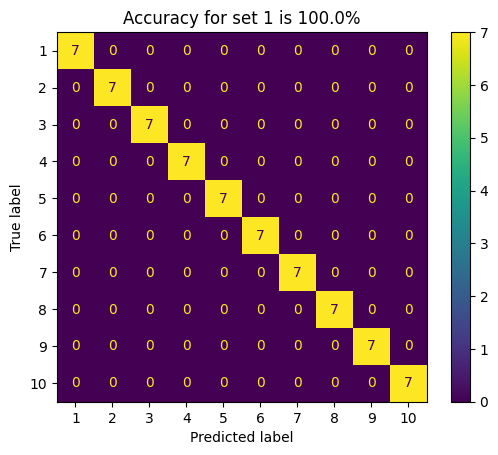

Confusion matrix


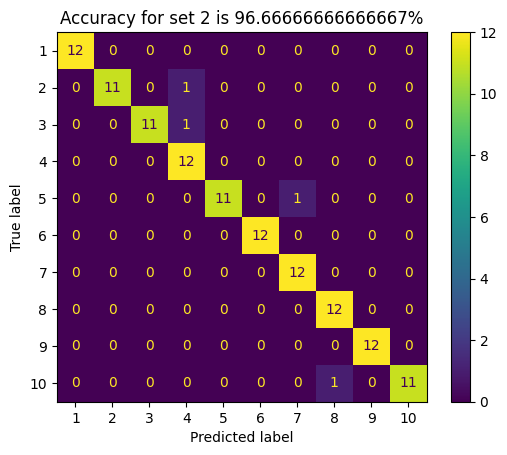

Confusion matrix


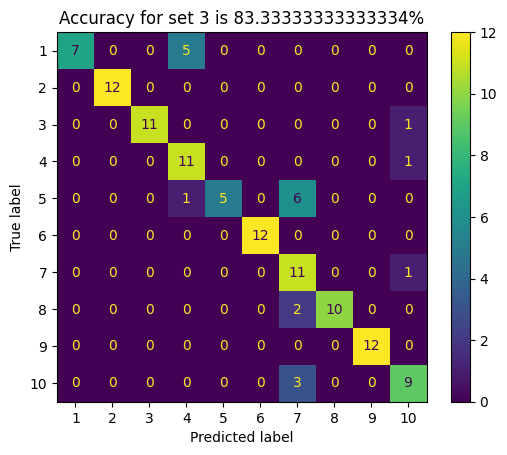

Confusion matrix


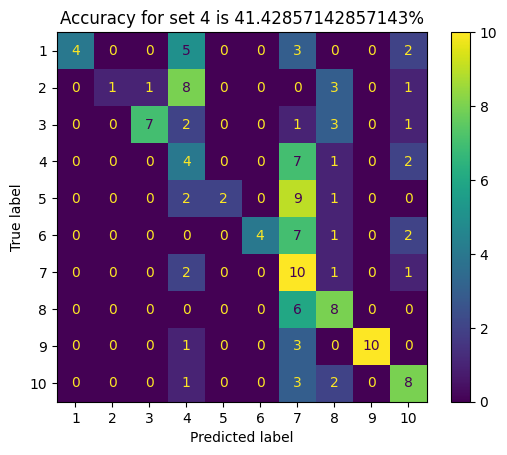

Confusion matrix


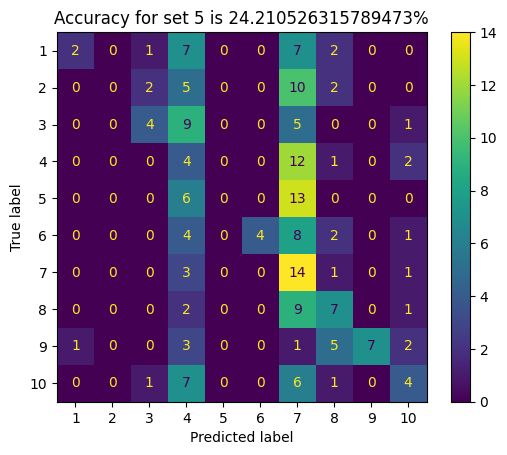

Dimension: 9
Accuracy of Set 1: 100.0%
Accuracy of Set 2: 96.66666666666667%
Accuracy of Set 3: 83.33333333333334%
Accuracy of Set 4: 41.42857142857143%
Accuracy of Set 5: 24.210526315789473%
Dimension: 30
Confusion matrix


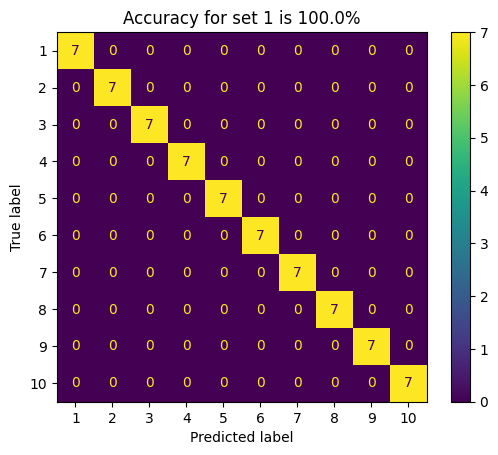

Confusion matrix


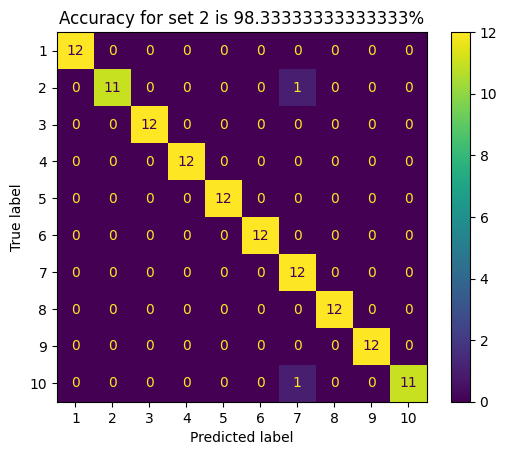

Confusion matrix


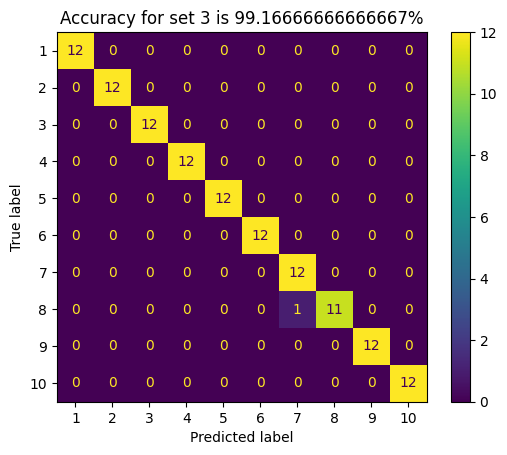

Confusion matrix


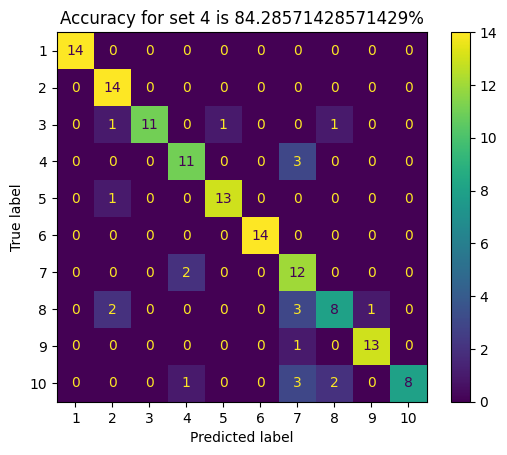

Confusion matrix


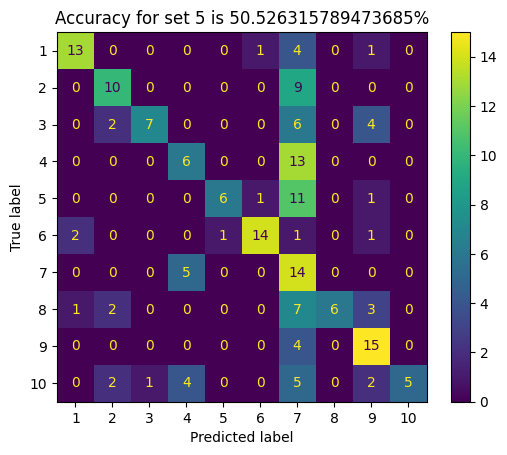

Dimension: 30
Accuracy of Set 1: 100.0%
Accuracy of Set 2: 98.33333333333333%
Accuracy of Set 3: 99.16666666666667%
Accuracy of Set 4: 84.28571428571429%
Accuracy of Set 5: 50.526315789473685%


In [4]:
X_set1, y_set1 = loadImages("/home/eva/Documents/machine_learning/project2/faces", "Set_1")
   
X_train_set_1 = normalization(X_set1) #Train the model with the first set of images

#for dimensions 9 and 30
dimensions = [9, 30]
#create a dictionary to store the results of the accuracy for every set of images
accuracy = {}
for d in dimensions:
    print("Dimension: " + str(d))
    pca = PCA(n_components=d, whiten=True) #Apply PCA
    X_train_pca = pca.fit_transform(X_train_set_1) #Fit the model using the initial training set(set 1)
    knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_set1)  #Train the model
    for set_number in range(1,6):
        #Test the model, for every set of images
        X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", "Set_" + str(set_number))
        X_test_set = normalization(X_set)
        X_test_set = pca.transform(X_test_set)
        y_pred = knn.predict(X_test_set)
        accuracy[str(set_number)] = accuracy_score(y_set, y_pred)*100
        #print("Accuracy for dimension " + str(d) + " is: " + str(accuracy))

        #Plot the confusion matrix for the set of images
        cm = confusion_matrix(y_set, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_set))
        disp.plot()
        print("Confusion matrix")
        plt.title("Accuracy for set " + str(set_number) + " is " + str(accuracy[str(set_number)]) + "%")
        plt.show()

    #print all accuracy metrics
    print("Dimension: " + str(d))
    for set_number in range(1,6):
        print("Accuracy of Set " + str(set_number) + ": " + str(accuracy[str(set_number)]) + "%")

Παρατηρώ ότι για d = 30, η ακρίβεια ταξινόμησης είναι υψηλότερη για τα υπόλοιπα sets****************************. 

## III: 9 top eigenvectors

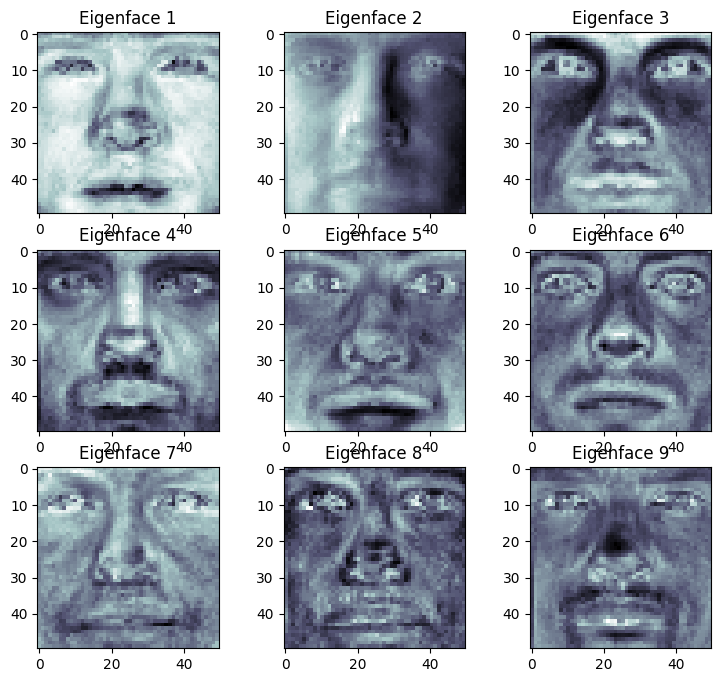

In [5]:
#plot the top 9 eigenfaces
plt.figure(figsize=(9, 8))
for i in range(9):  
    plt.subplot(3, 3, i + 1)
    eigenfaces = pca.components_[i].reshape(50,50)
    plt.title("Eigenface " + str(i+1))
    plt.imshow(eigenfaces, cmap='bone')
plt.show()


## IV: Recreate images

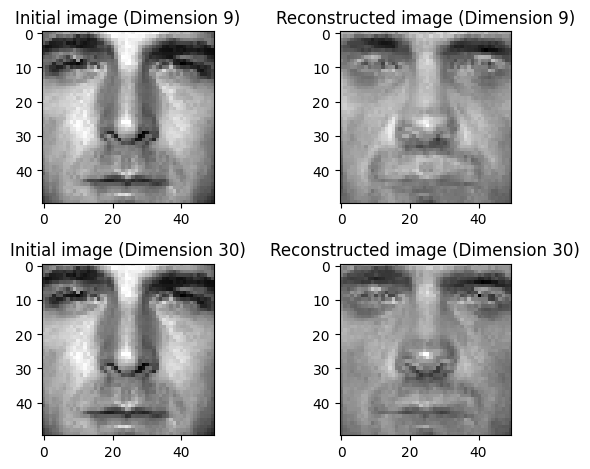

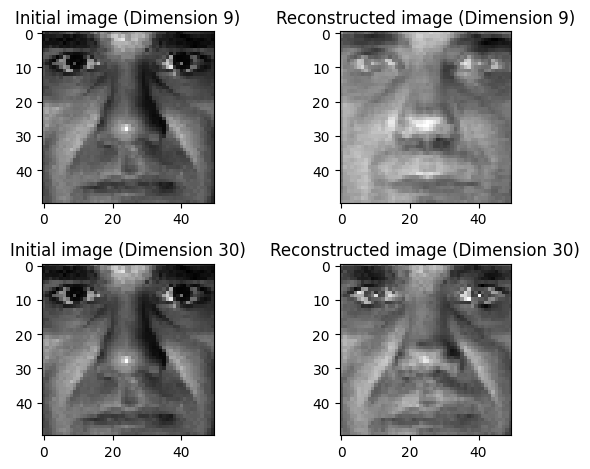

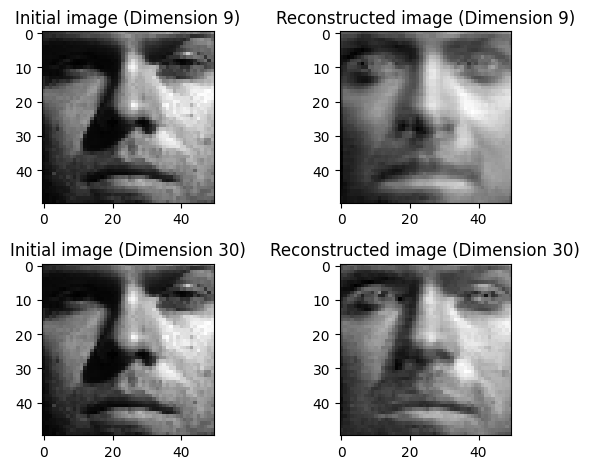

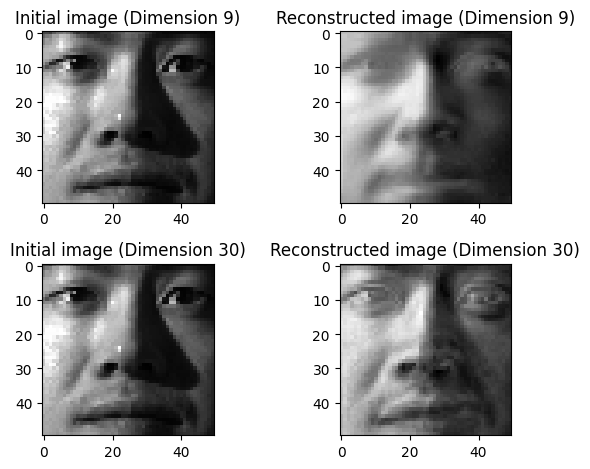

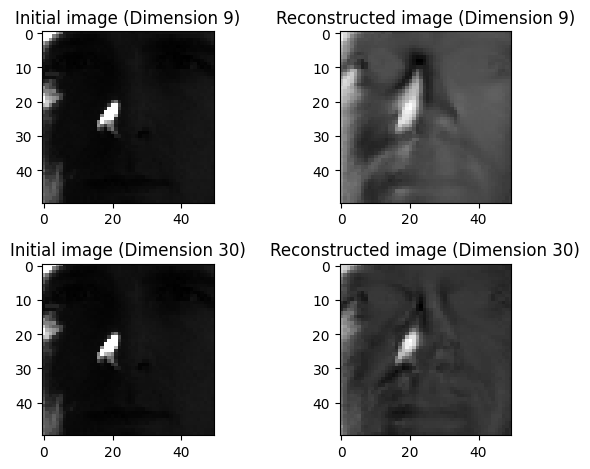

In [6]:
#for every dimension recreate a random image for each of the 5 sets of images
#and plot the initial image and the reconstructed image
#dictionary to store the initial image, and the reconstructed image for both dimensions

dimensions = [9, 30]
initial_reconstructed = {}

for set_number in range(1, 6):
    X_set, y_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", "Set_" + str(set_number))
    random_image = np.random.randint(0, X_set.shape[0])  # Choose a random image
     
    for i, d in enumerate(dimensions):
        pca = PCA(n_components=d, whiten=True)  # Apply PCA with the current dimension
        X_train_pca = pca.fit_transform(X_set)  # Fit PCA with the training data
        original_image = normalization(X_set[random_image])  # Normalize the original image
    
        transformed_image = pca.transform(original_image.reshape(1, -1))  # Transform the image using the fitted PCA model
        reconstructed_image = pca.inverse_transform(transformed_image).reshape(50, 50)  # Reconstruct the image using the fitted PCA model
        reconstructed_image += np.mean(X_set1)  # Denormalize the reconstructed image
        initial_reconstructed[str(set_number) + "_" + str(d) ] = [original_image, reconstructed_image]

        plt.subplot(len(dimensions), 2, i*2 + 1)
        plt.title("Initial image (Dimension " + str(d) + ")")
        plt.imshow(original_image.reshape(50, 50), cmap='gray')

        plt.subplot(len(dimensions), 2, i*2 + 2)
        plt.title("Reconstructed image (Dimension " + str(d) + ")")
        plt.imshow(reconstructed_image, cmap='gray')

    plt.tight_layout()
    plt.show()


H ανακατασκευή της εικόνας από το πρώτο σετ, το οποίο χρησιμοποιήθηκε για την εκπαίδευση είναι η πιο ακριβής, Στο 2ο σετ η ποιότητα είναι λίγο χαμηλότερη, αλλά αρκετά υψηλή. Με την αυξηση των διαστάσεων σε 30 απο 9 οι ανακατασκευασμένες εικόνες περιέχουν περισσότερες λεπτομέρειες.

Στο τρίτο σετ εικόνων, η ποιότητα της ανακατασκευής αρχίζει να χειροτερεύει, ιδιαίτερα για d=9 όπου είναι αρκετά χαμηλή. Ωστόσο, για d=30 παρατηρούμε βελτίωση και εμφανίζονται περισσότερα χαρακτηριστικά του προσώπου, τα οποία είναι παρόμοια με αυτά του αρχικού προσώπου στην αρχική εικόνα.


???????????????????????????????????
Τέλος, στο τέταρτο και πέμπτο σετ εικόνων, η ανακατασκευή για d=9 δεν είναι καλή και πλησιάζει το "average" mean πρόσωπο του training set, καθώς δεν υπάρχει αρκετή πληροφορία. Ωστόσο, για d=30 παρατηρείται κάποια βελτίωση και υπάρχει περισσότερη λεπτομέρεια, αλλά παραμένει μακριά από την αρχική εικόνα. Αυτό είναι αναμενόμενο λόγω των διαφορετικών συνθηκών φωτισμού που υπάρχουν σε αυτά τα δύο τελευταία υποσύνολα εικόνων, τα οποία είναι τελείως διαφορετικά από το σετ 1 που χρησιμοποιήθηκε για την εκπαίδευση της μεθόδου.

## V:9 singular vectors

Eigenvectors


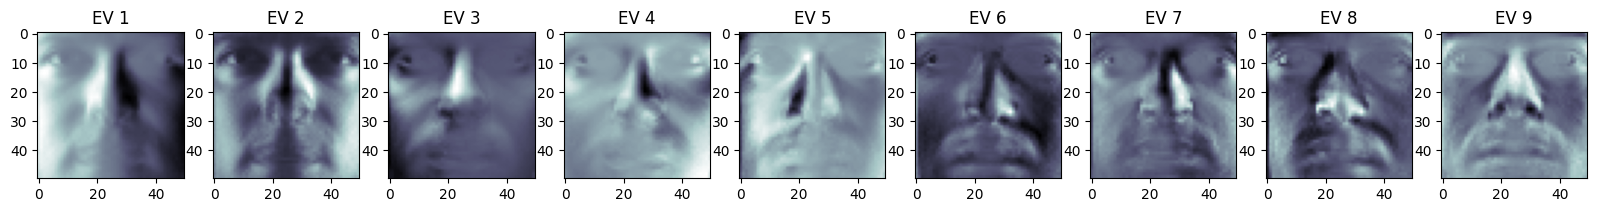


Singular vectors


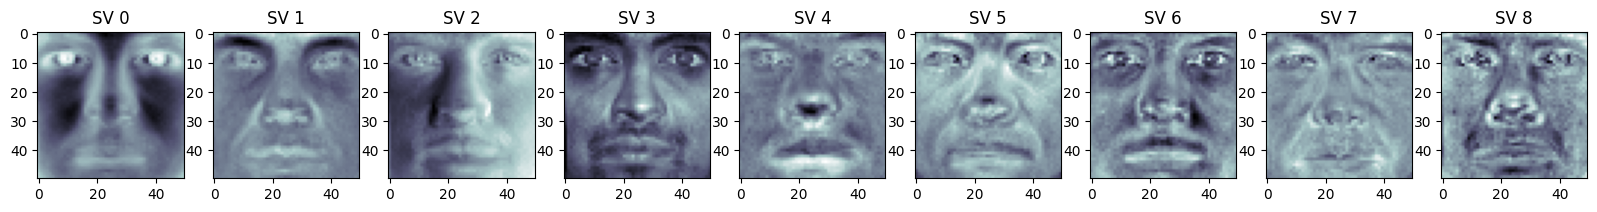

In [7]:
#plot the 9 singular vectors, for the first set of images after applying SVD
U, S, V = np.linalg.svd(X_set1, full_matrices=False)

#plot the top 9 eigenfaces
print("Eigenvectors")
plt.figure(figsize=(20, 20))
for i in range(1,10):
  plt.subplot(1, 9, i)
  plt.title('EV %d' %i, fontweight ="light")
  plt.imshow(pca.components_[i-1].reshape(50, 50), cmap='bone')
plt.show()

#plot the top 9 singular vectors
print("\nSingular vectors")
plt.figure(figsize=(20, 20))
for i in range(1,10):
  plt.subplot(1, 9, i)
  plt.title('SV %d' %(i-1), fontweight ="light")
  plt.imshow(V[i-1,:].reshape(50, 50), cmap='bone')
plt.show()

Στα δεδομένα του PCA έχει γίνει normalization, όπου έχει αφαιρεθεί η μέση τιμή και έχει διαιρεθεί με την τυπική απόκλιση. Άρα από τα eigenvectors λείπει αυτη η πληροφορία, και οι διαφορές ανάμεσα στις εικόνες που προκύπτουν με τις δύο μεθόδους, οφείλονται σε αυτό.

# Classification using SVMs

In [8]:
!pip3 install pandas
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Linear SVM vs RBF kernel

In [9]:
# Fetch the MNIST dataset
dataset = fetch_openml('mnist_784', version='1', parser='auto')
print(dataset.data.shape)
# Separate the features (X) and labels (y)
X, y = dataset['data'], dataset['target']
print("X.shape = " , X.shape, "y.shape = " , y.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=42)
# Normalize the features to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
print("X_train_normalized.shape = " , X_train_normalized.shape, "X_test_normalized.shape = " , X_test_normalized.shape)

# Define the parameter grid for C and gamma
param_grid = {'C': [0.5, 1, 1.5],
              'gamma': [0.5, 1, 1.5],
              'kernel': ['linear', 'rbf']}

# Create the SVM model
svm_model = SVC()

# Perform grid search with cross-validation
print("Performing grid search...")
grid_search = GridSearchCV(svm_model, param_grid, n_jobs=3)

grid_search.fit(X_train_normalized, y_train)

print("Grid search done.")
print("Best parameters found:", grid_search.best_params_)

# Get the best parameters found
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
best_kernel = grid_search.best_params_['kernel']
print("Best C value:", best_C)
print("Best gamma value:", best_gamma)

# Train the SVM model with the best parameters
best_svm_model = SVC(C=best_C, gamma=best_gamma, kernel=best_kernel)
best_svm_model.fit(X_train_normalized, y_train)

# Predict labels for the test set
y_pred = best_svm_model.predict(X_test_normalized)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameter values and accuracy
print("Best kernel:", best_kernel)
print("Best C value:", best_C)
print("Best gamma value:", best_gamma)
print("Accuracy:", accuracy)


(70000, 784)
X.shape =  (70000, 784) y.shape =  (70000,)
X_train_normalized.shape =  (60000, 784) X_test_normalized.shape =  (10000, 784)
Performing grid search...
